# Overview

Provide an overview of the WSRA datasets.

In [1]:
import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywsra
import xarray as xr

import plotting
from configure import read_stored_variable

## Setup

In [2]:
# %run 'nb1-transform.ipynb'
%run -i configure.py

earl_merged_ds = read_stored_variable('earl_merged_ds')
fiona_merged_ds = read_stored_variable('fiona_merged_ds')
ian_merged_ds = read_stored_variable('ian_merged_ds')
# julia_merged_ds = read_stored_variable('julia_merged_ds')
idalia_merged_ds = read_stored_variable('idalia_merged_ds')
lee_merged_ds = read_stored_variable('lee_merged_ds')
atomic_merged_ds = read_stored_variable('atomic_merged_ds')

earl_unmasked_ds = read_stored_variable('earl_ds')
fiona_unmasked_ds = read_stored_variable('fiona_ds')
ian_unmasked_ds = read_stored_variable('ian_ds')
julia_unmasked_ds = read_stored_variable('julia_ds')
idalia_unmasked_ds = read_stored_variable('idalia_ds')
lee_unmasked_ds = read_stored_variable('lee_ds')
atomic_unmasked_ds = read_stored_variable('atomic_ds')

earl_best_track = read_stored_variable('earl_best_track')
fiona_best_track = read_stored_variable('fiona_best_track')
ian_best_track = read_stored_variable('ian_best_track')
# julia_best_track = read_stored_variable('julia_best_track')
idalia_best_track = read_stored_variable('idalia_best_track')
lee_best_track = read_stored_variable('lee_best_track')

plotting.configure_figures()

## Global Map

In [4]:
def plot_colocated_drifter(
    wsra_ds: pd.DataFrame,
    drifter_type: str,
    ax, #: GeoAxes,
    color_column_name = None, #: Optional[str] = None,
    **kwargs,
): # -> PathCollection:
    prefix = drifter_type + '_'
    plot = ax.scatter(wsra_ds[prefix + 'longitude'],
                      wsra_ds[prefix + 'latitude'],
                      c=color_column_name,
                      **kwargs)
    return plot

#TODO: put this in plotting and add automatic marker labels (yellow pentagon for spotter) and return a legend function (see it in hurricane idalia evolution)
#TODO: add this as figure in CWTM abstact

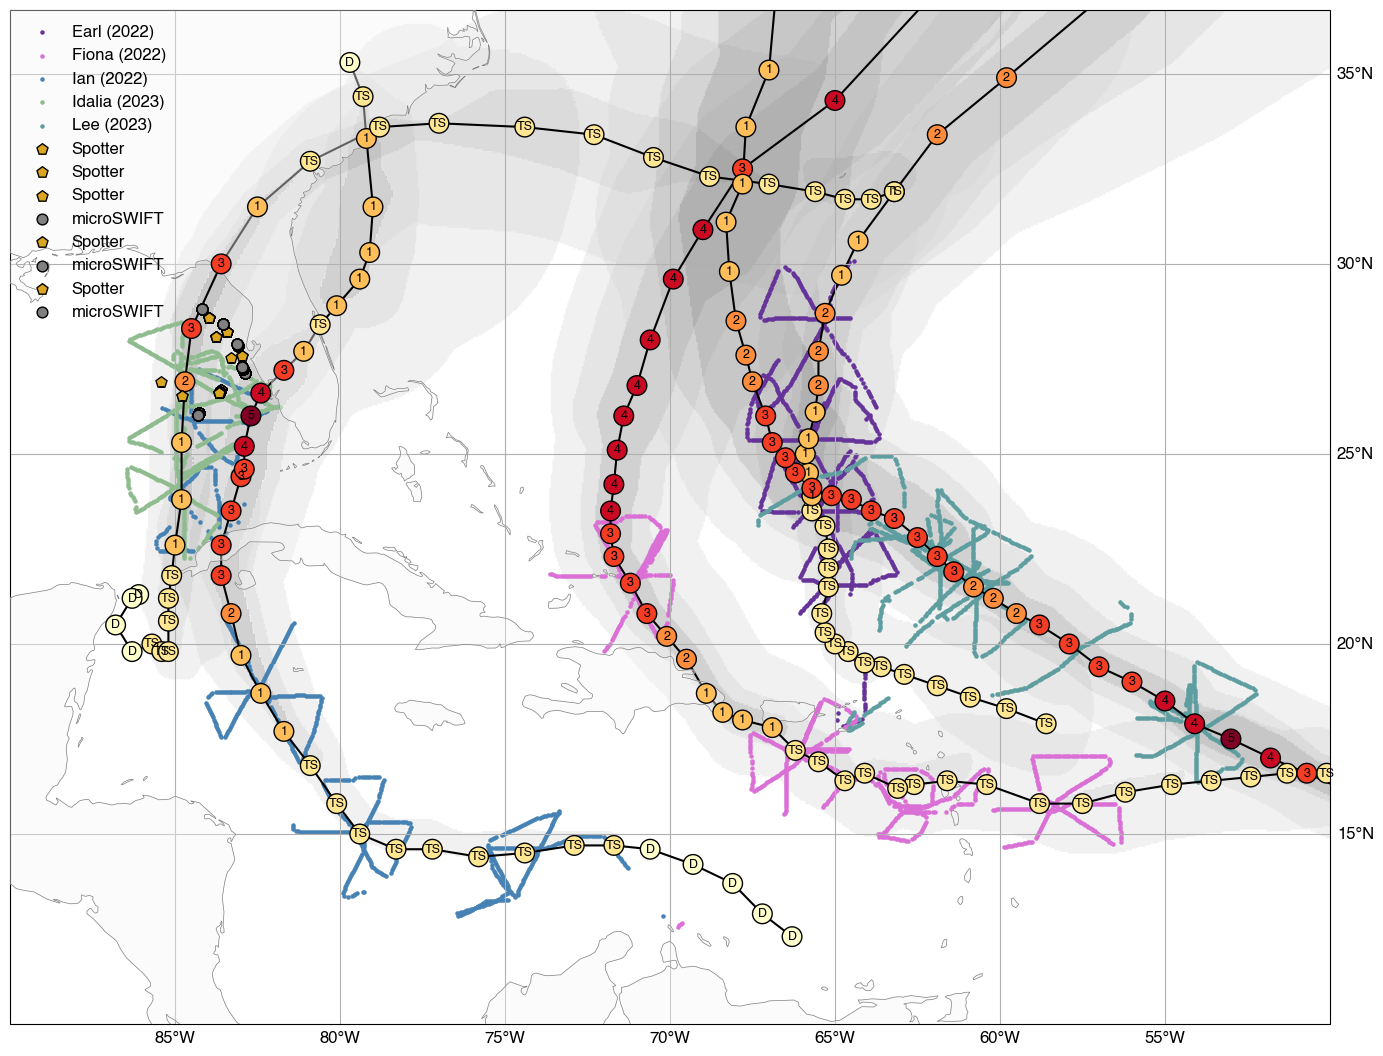

In [5]:
FIG_TITLE = f"wsra_track_summary_2022-2023"
FIG_SIZE = (14, 14)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-90, -50, 10, 35])
CRS = cartopy.crs.PlateCarree()

# Initialize the figure
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)

# Add the ocean and land features
plotting.plot_base_chart(ax, extent=EXTENT)

# Plot best tracks
plotting.plot_best_track(*earl_best_track, ax=ax)
plotting.plot_best_track(*fiona_best_track, ax=ax)
plotting.plot_best_track(*ian_best_track, ax=ax)
# plotting.plot_best_track(*julia_best_track, ax=ax)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_best_track(*lee_best_track, ax=ax)

# Plot WSRA tracks
plotting.plot_wsra_track(earl_merged_ds, ax=ax)
plotting.plot_wsra_track(fiona_merged_ds, ax=ax)
plotting.plot_wsra_track(ian_merged_ds, ax=ax)
# plotting.plot_wsra_track(julia_merged_ds, ax=ax)
plotting.plot_wsra_track(idalia_merged_ds, ax=ax)
plotting.plot_wsra_track(lee_merged_ds, ax=ax)

# Plot colocated drifter tracks
plotting.plot_colocated_drifter(earl_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(fiona_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(ian_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(ian_merged_ds, drifter_type='microswift', ax=ax)
plotting.plot_colocated_drifter(idalia_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_merged_ds, drifter_type='microswift', ax=ax)
plotting.plot_colocated_drifter(lee_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(lee_merged_ds, drifter_type='microswift', ax=ax)


ax.legend(loc='upper left', frameon=False)
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Earl

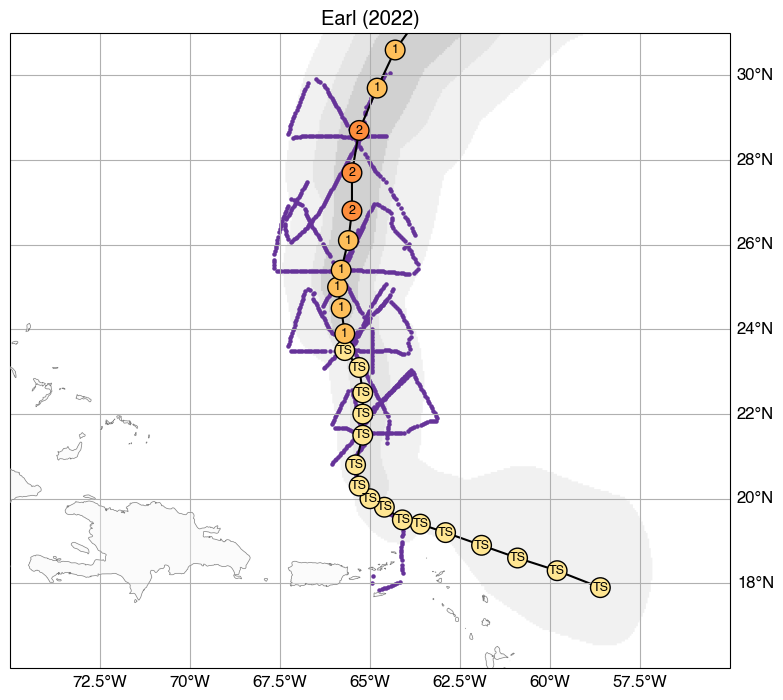

In [6]:
FIG_TITLE = f"wsra_track_earl_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-75, -55, 16, 31])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*earl_best_track, ax=ax)
plotting.plot_wsra_track(earl_merged_ds, ax=ax)
plotting.plot_colocated_drifter(earl_merged_ds, drifter_type='spotter', ax=ax)

ax.set_title(plotting.get_storm_label(earl_merged_ds.attrs['storm_name']))
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Fiona

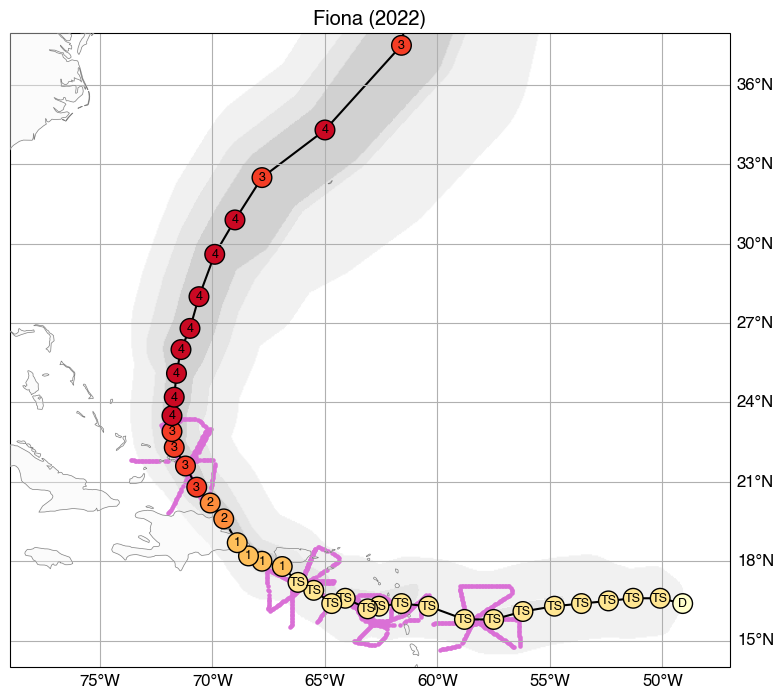

In [7]:
FIG_TITLE = f"wsra_track_fiona_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-79, -47, 14, 37])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*fiona_best_track, ax=ax)
plotting.plot_wsra_track(fiona_merged_ds, ax=ax)
plotting.plot_colocated_drifter(fiona_merged_ds, drifter_type='spotter', ax=ax)
ax.set_title(plotting.get_storm_label(fiona_merged_ds.attrs['storm_name']))
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Ian

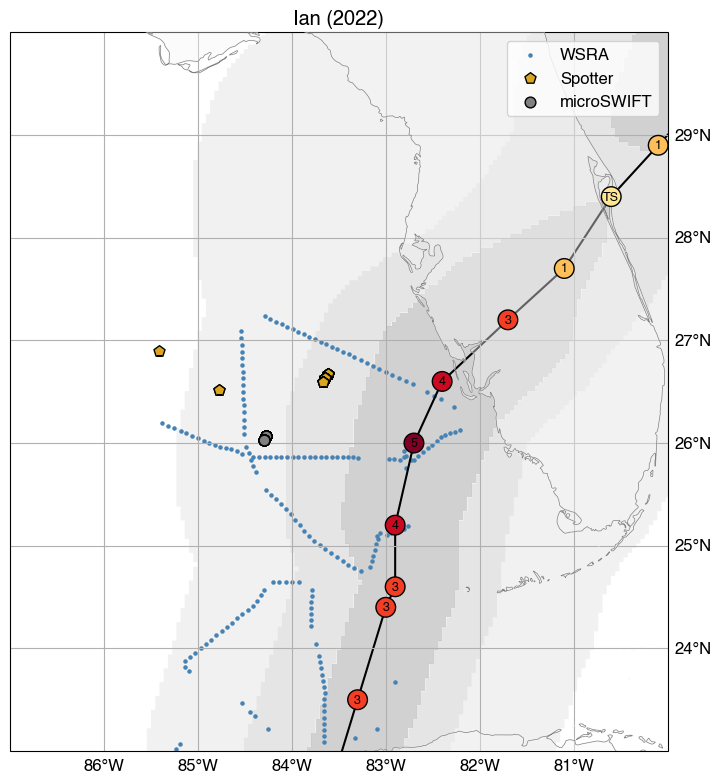

In [8]:
FIG_TITLE = f"wsra_track_ian_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
# EXTENT = np.array([-90, -70, 12, 30])
EXTENT = np.array([-87, -80, 23, 30])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*ian_best_track, ax=ax)
plotting.plot_wsra_track(ian_merged_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(ian_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(ian_merged_ds, drifter_type='microswift', ax=ax)
# plot_colocated_drifter(ian_merged_ds, drifter_type='microswift', ax=ax)
ax.set_title(plotting.get_storm_label(ian_merged_ds.attrs['storm_name']))
fig.tight_layout()
ax.legend()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Idalia

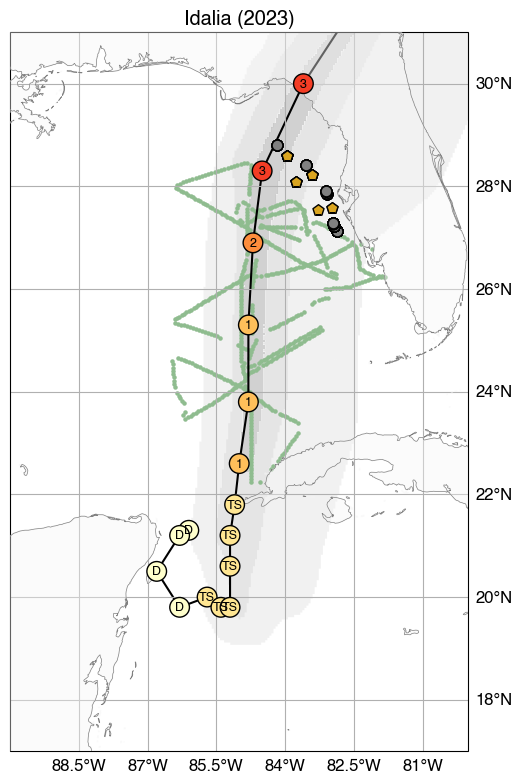

In [9]:
FIG_TITLE = f"wsra_track_idalia_2023"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-90, -80, 17, 31])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_wsra_track(idalia_merged_ds, ax=ax)
plotting.plot_colocated_drifter(idalia_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_merged_ds, drifter_type='microswift', ax=ax)
ax.set_title(plotting.get_storm_label(idalia_merged_ds.attrs['storm_name']))
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Lee

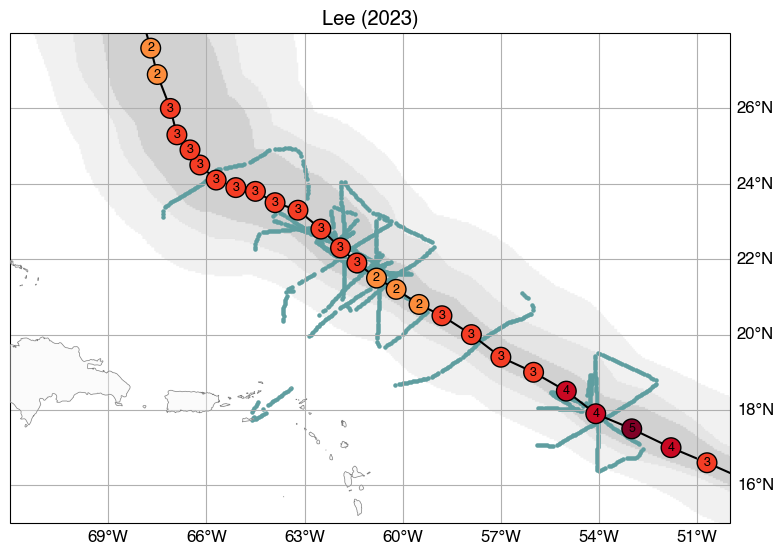

In [10]:
FIG_TITLE = f"wsra_track_lee_2022"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-72, -50, 15, 28])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*lee_best_track, ax=ax)
plotting.plot_wsra_track(lee_merged_ds, ax=ax)
plotting.plot_colocated_drifter(lee_merged_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(lee_merged_ds, drifter_type='microswift', ax=ax)
ax.set_title(plotting.get_storm_label(lee_merged_ds.attrs['storm_name']))
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## ATOMIC

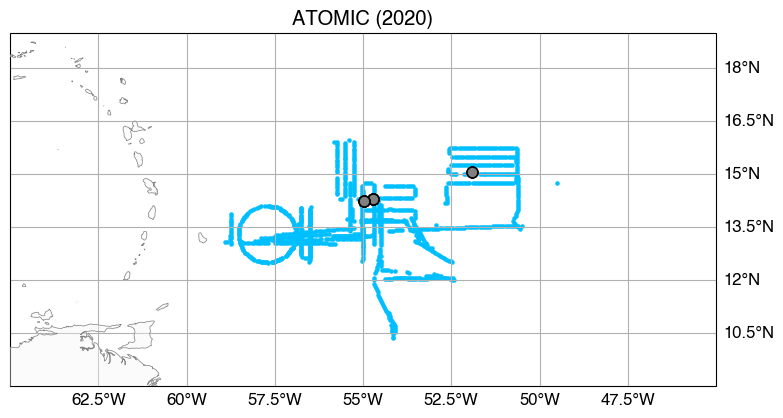

In [5]:
FIG_TITLE = f"wsra_track_atomic_2020"
FIG_SIZE = (8, 8)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-65, -45, 9, 19])
CRS = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_merged_ds, ax=ax)
plotting.plot_colocated_drifter(atomic_merged_ds, drifter_type='swift', ax=ax)
ax.set_title(plotting.get_storm_label(atomic_merged_ds.attrs['storm_name']))
fig.tight_layout()
# fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()